# 02 - Exploratory Data Analysis (EDA)

In this notebook, we will:
- Load the **cleaned** dataset.
- Perform **univariate** analysis on numeric and categorical features.
- Perform **bivariate** analysis (e.g., scatter plots, boxplots).
- Generate a **correlation heatmap** for key numeric features.


## Import Libraries & Load Data

We start by importing the necessary libraries and then load the cleaned dataset (saved as `hr_data_cleaned.csv` from the previous notebook).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Load the cleaned dataset
df = pd.read_csv("hr_data_cleaned.csv")
print("DataFrame shape:", df.shape)
df.head()


DataFrame shape: (1470, 36)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureBucket
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,3-6
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,6-10
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,<3


## Univariate Analysis: Numeric Features

Let's explore the distributions of some key numeric variables such as **Age** and **PercentSalaryHike**. We will use histograms with KDE plots for visualization.


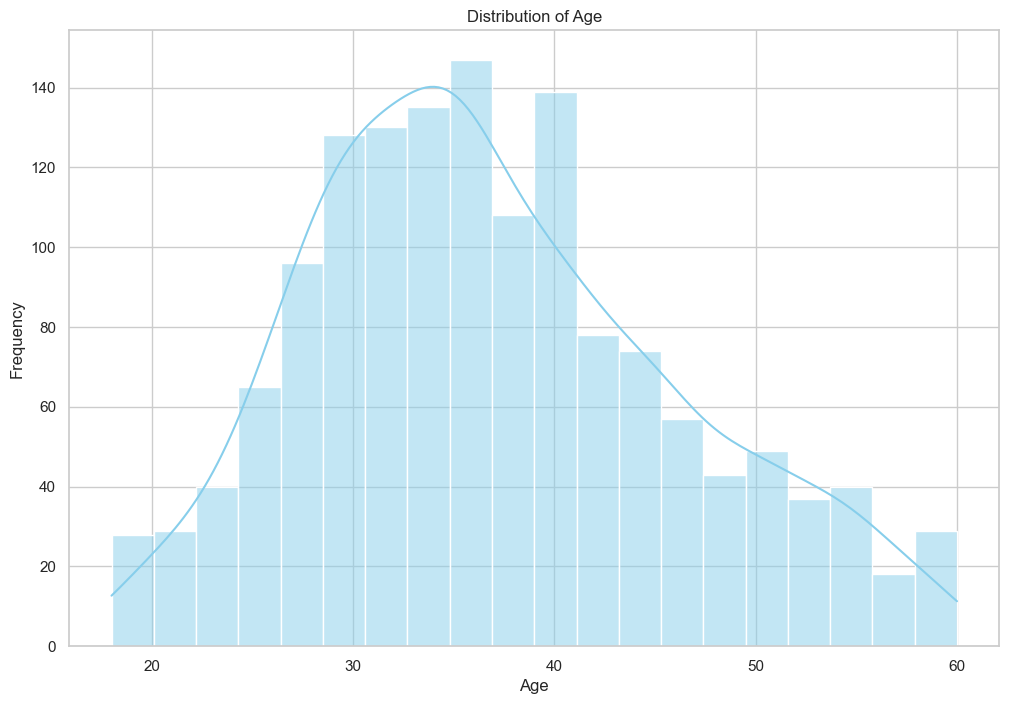

In [3]:
# Distribution of Age
plt.figure()
sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



The distribution appears roughly unimodal, with a peak around the mid 30s.
Most employees seem to fall between their early 30s to early 40s, indicating a relatively young workforce.

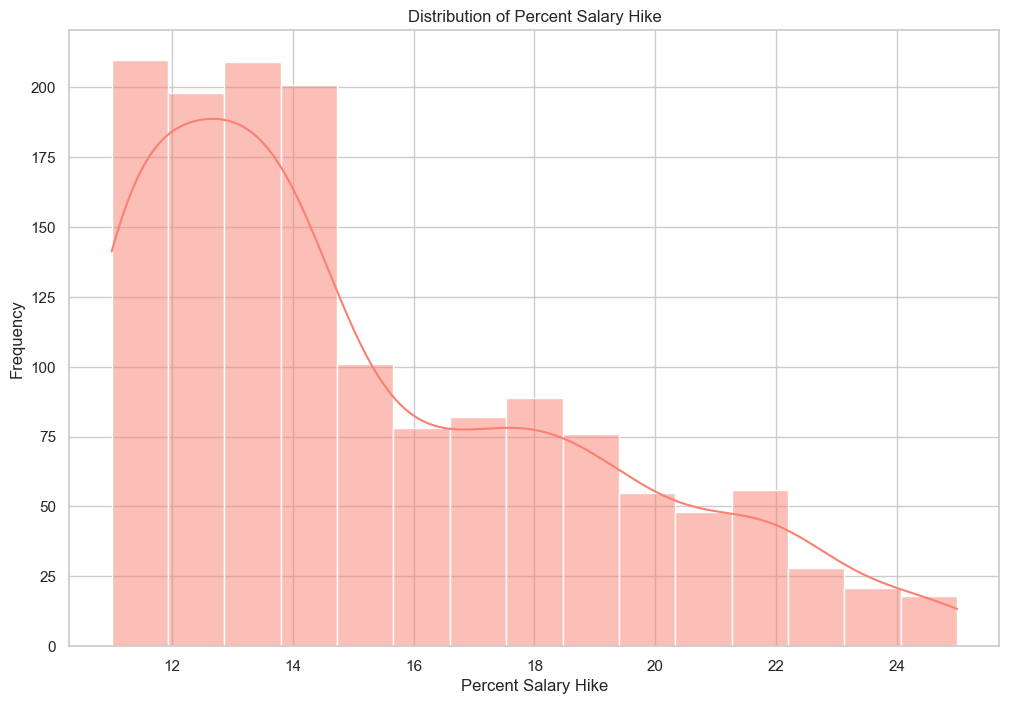

In [4]:

# Distribution of PercentSalaryHike
plt.figure()
sns.histplot(df["PercentSalaryHike"], kde=True, bins=15, color="salmon")
plt.title("Distribution of Percent Salary Hike")
plt.xlabel("Percent Salary Hike")
plt.ylabel("Frequency")
plt.show()

The Percent Salary Hike distribution is heavily concentrated between roughly 11% and 15%, with a clear peak around 12%. It then tapers off toward the higher end (above 18%), this indicates that not a lot of employees get hikes higher than 16%. This will be interesting to see if age for example plays a part in the salary hike.

## Univariate Analysis: Categorical Features

Next, we look at the frequency distribution of categorical variables.  
For example, we examine the **Attrition** status and the distribution of employees by **Department**.


C:\Users\darre\AppData\Local\Temp\ipykernel_13012\3832889199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="Set2")


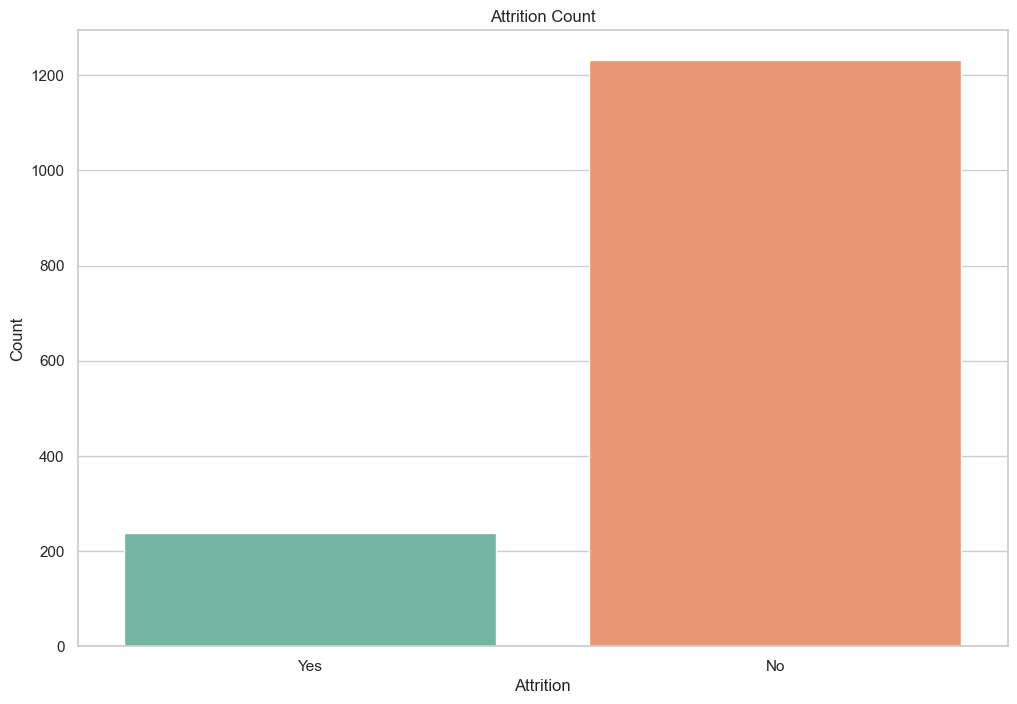

C:\Users\darre\AppData\Local\Temp\ipykernel_13012\3832889199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Department", data=df, palette="Set3")


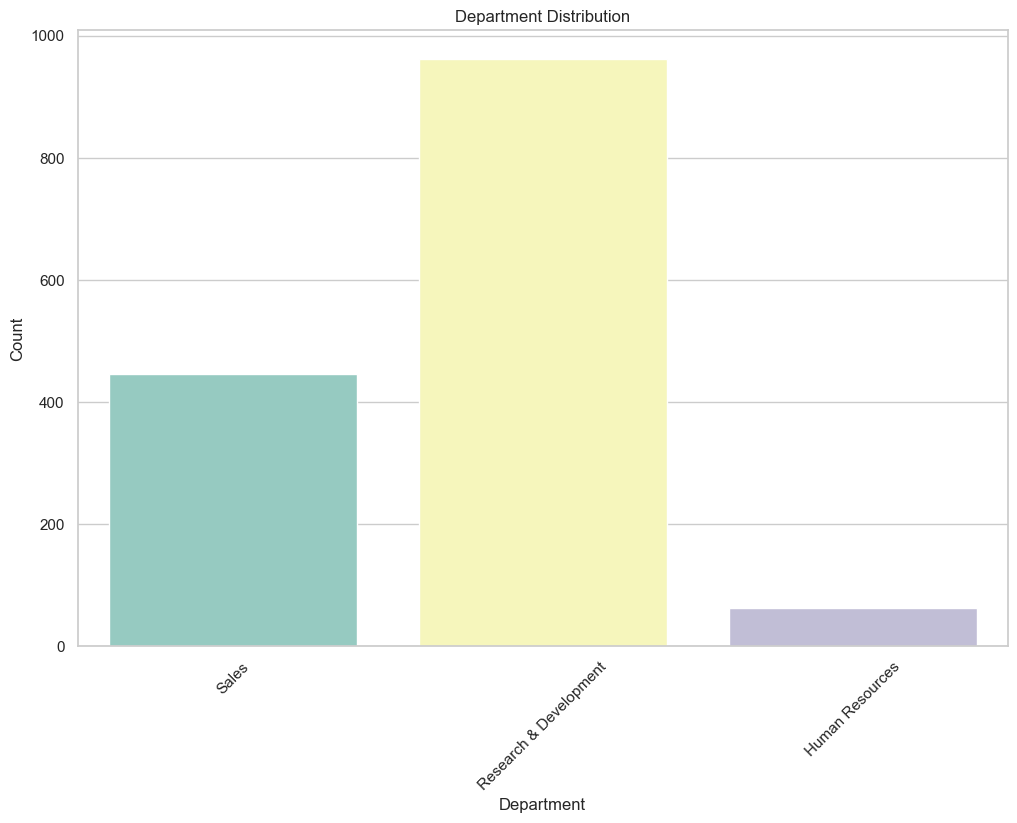

In [5]:
# Attrition count
plt.figure()
sns.countplot(x="Attrition", data=df, palette="Set2")
plt.title("Attrition Count")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

# Department distribution
plt.figure()
sns.countplot(x="Department", data=df, palette="Set3")
plt.title("Department Distribution")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



This just gives us an idea of the data we're working with. We see our dataset has a larger number of employees who has not faced attrition. Meanwhile majority of employees are from R&D. Very few employees from HR.

## Categorical Analysis: Attrition by Tenure Bucket

Here we visualize how attrition is distributed across different tenure buckets (a new feature we created in the data cleaning notebook).


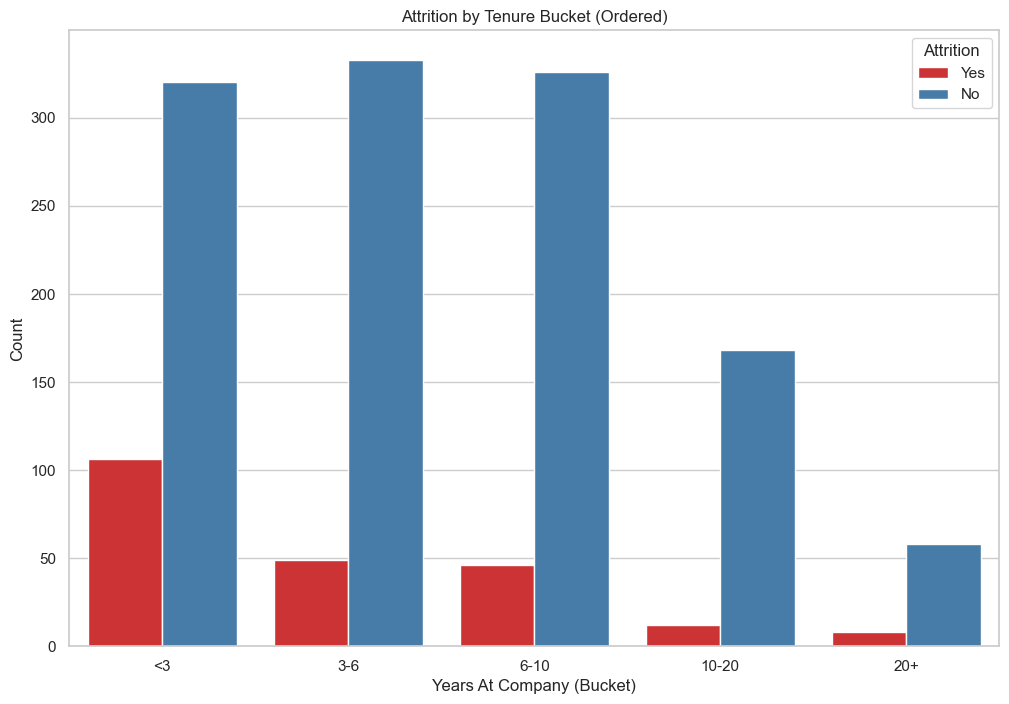

In [6]:
df["TenureBucket"] = pd.Categorical(
    df["TenureBucket"], 
    categories=["<3","3-6","6-10","10-20","20+"],
    ordered=True
)

plt.figure()
sns.countplot(
    x="TenureBucket", 
    hue="Attrition", 
    data=df, 
    palette="Set1",
    order=["<3","3-6","6-10","10-20","20+"]
)
plt.title("Attrition by Tenure Bucket (Ordered)")
plt.xlabel("Years At Company (Bucket)")
plt.ylabel("Count")
plt.show()



From this we can see attrition decreases as years in the company increases, which is logical. Though 3-6 and 6-10 has almost the same level of attrition which is something interesting we can look into.

## Bivariate Analysis

### Monthly Income vs. Job Level
We use a boxplot to compare the **MonthlyIncome** across different **JobLevel** values.

### Total Working Years vs. Monthly Income by Attrition
A scatter plot is created to see the relationship between **TotalWorkingYears** and **MonthlyIncome**, with data points colored by attrition status.


C:\Users\darre\AppData\Local\Temp\ipykernel_13012\2068821318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="JobLevel", y="MonthlyIncome", data=df, palette="coolwarm")


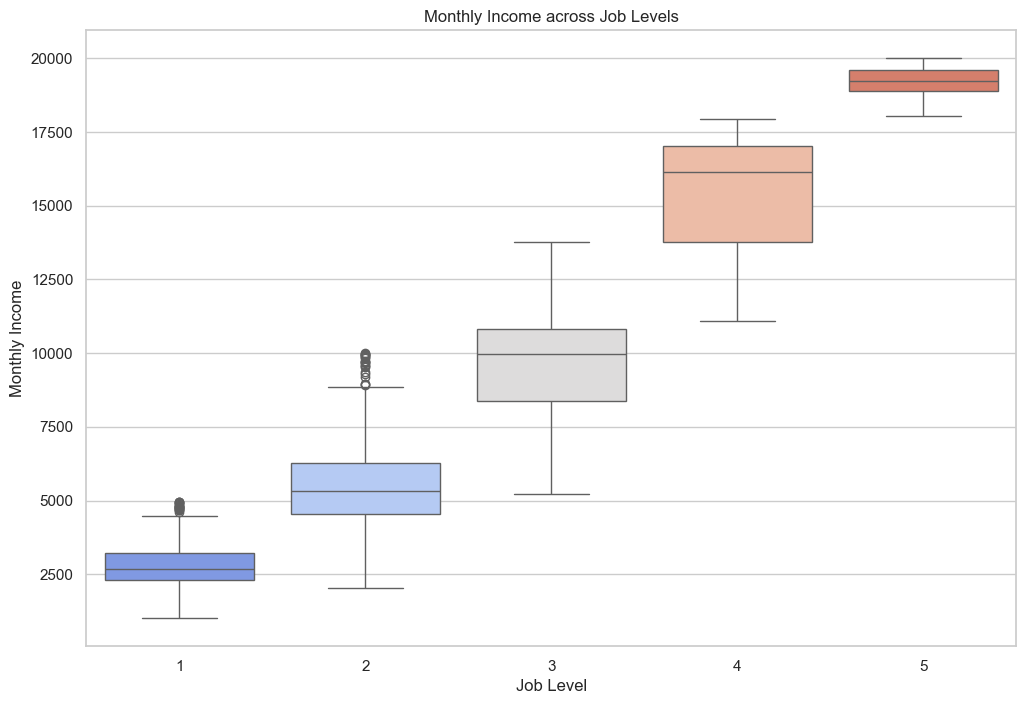

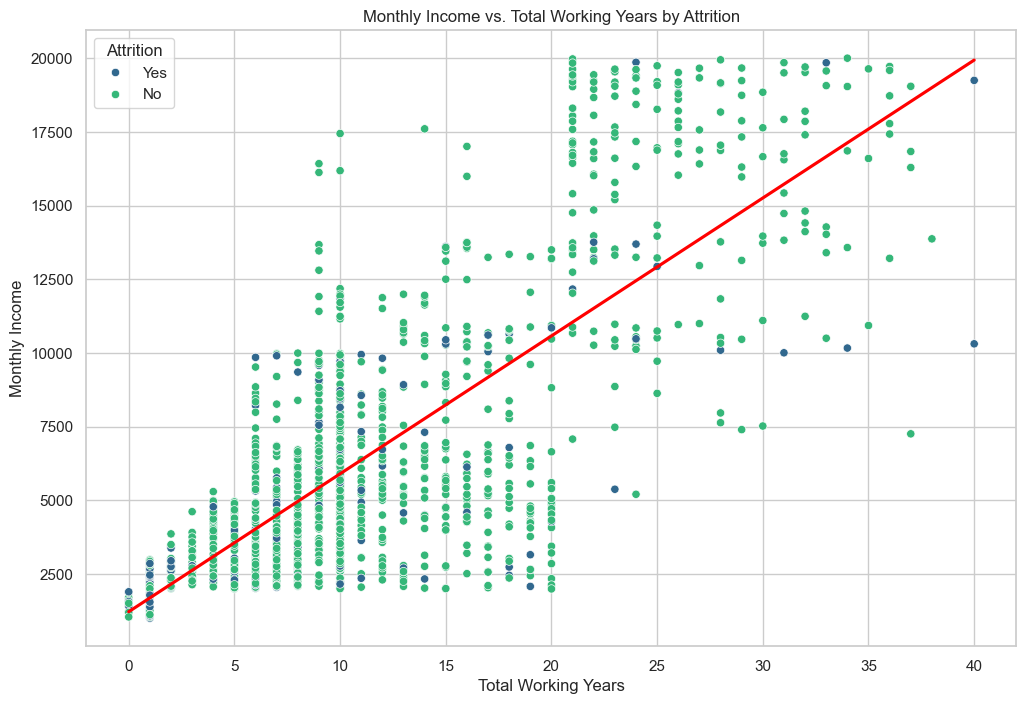

In [7]:
# Boxplot: Monthly Income across Job Levels
plt.figure()
sns.boxplot(x="JobLevel", y="MonthlyIncome", data=df, palette="coolwarm")
plt.title("Monthly Income across Job Levels")
plt.xlabel("Job Level")
plt.ylabel("Monthly Income")
plt.show()

# Scatter plot: TotalWorkingYears vs. MonthlyIncome by Attrition
plt.figure()
sns.scatterplot(x="TotalWorkingYears", y="MonthlyIncome", hue="Attrition", data=df, palette="viridis")
# Add a regression line (correlation line)
sns.regplot(x="TotalWorkingYears", y="MonthlyIncome", data=df, scatter=False, color="red", ci=None)
plt.title("Monthly Income vs. Total Working Years by Attrition")
plt.xlabel("Total Working Years")
plt.ylabel("Monthly Income")
plt.show()


This boxplot shows a clear positive relationship between job level and monthly income. As job level increases, the median monthly income rises significantly. The scaterplot also suggest a positive relationship between Monthly Income and Total Working Years. We can determine the correlation value with a heatmap below.

## Multivariate Analysis: Correlation Heatmap

We now generate a correlation heatmap for selected numeric features to understand the relationships and potential multicollinearity among them.


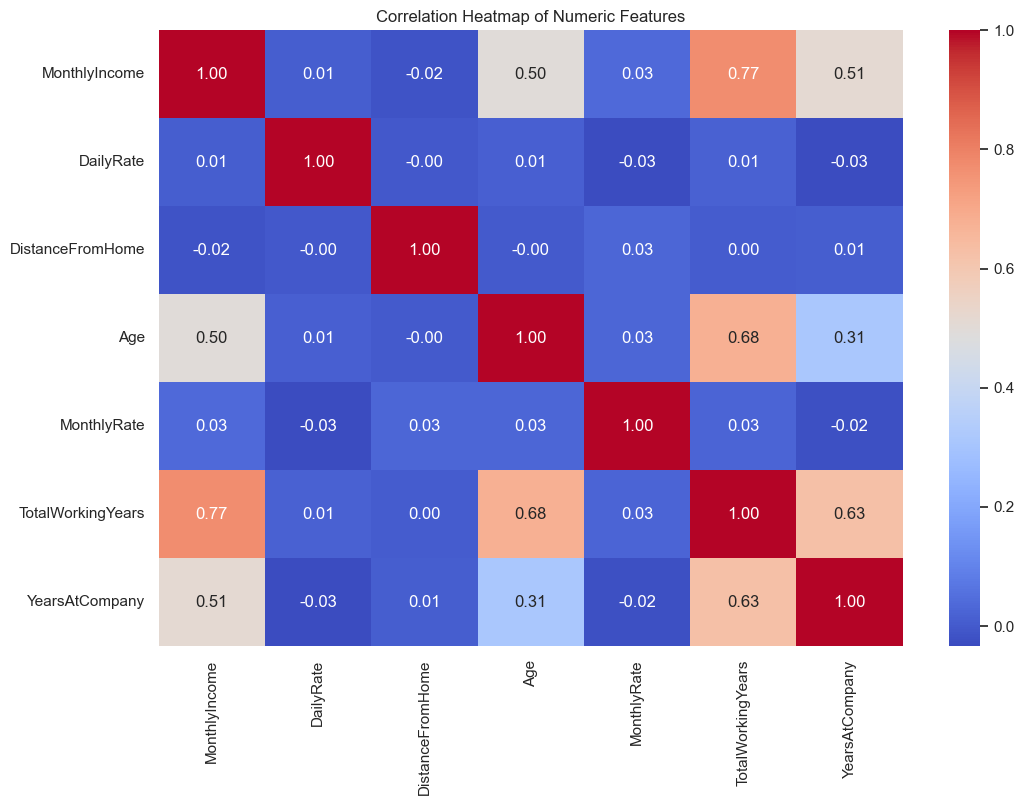

In [8]:
# Define the numeric columns of interest
numeric_cols = ["MonthlyIncome", "DailyRate", "DistanceFromHome", "Age", 
                "MonthlyRate", "TotalWorkingYears", "YearsAtCompany"]

plt.figure()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


From this heatmap, a few notable relationships stand out:

- **MonthlyIncome** has a strong positive correlation with **TotalWorkingYears** (0.77), indicating that employees with more overall experience tend to earn higher salaries.
- **MonthlyIncome** also shows a moderate correlation (0.51) with **YearsAtCompany**, suggesting that tenure at the current organization also plays a role in pay, though less strongly than total experience. 
- **Age** correlates significantly with **TotalWorkingYears** (0.68) but less so with **YearsAtCompany** (0.31). This implies older employees have more experience but their experience may not be in the same company.
- **DistanceFromHome**, **DailyRate**, and **MonthlyRate** don't seem to have much correlation with other features. In fact it seems daily rate and monthly rate don't seem to mean how much they are paid in a day or a month.
